## Technical Analysis: MACD and Stochastic Oscillator

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import cufflinks as cf
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from ta.trend import MACD
from ta.momentum import StochasticOscillator
import warnings
warnings.simplefilter('ignore')

### Download Stock Data

In [2]:
amd_df = yf.download(tickers="AMD", period="1y", interval="1d")
amd_df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-06-01,117.290001,121.279999,116.599998,119.470001,119.470001,66032900
2023-06-02,120.750000,121.660004,117.680000,117.860001,117.860001,52331100
2023-06-05,116.589996,119.320000,116.419998,117.930000,117.930000,52602900
2023-06-06,117.910004,124.419998,117.739998,124.230003,124.230003,75257500
2023-06-07,124.029999,125.339996,117.070000,117.830002,117.830002,81755200
...,...,...,...,...,...,...
2024-05-24,161.410004,167.660004,160.250000,166.360001,166.360001,54795400
2024-05-28,169.419998,174.550003,164.960007,171.610001,171.610001,66495400
2024-05-29,167.460007,168.479996,162.910004,165.139999,165.139999,56537500


### Exponential Moving Average

In [3]:
amd_df['MA20'] = amd_df['Adj Close'].ewm(span=20, adjust=False).mean()
amd_df['MA50'] = amd_df['Adj Close'].ewm(span=50, adjust=False).mean()
amd_df

,Open,High,Low,Close,Adj Close,Volume,MA20,MA50
Date,,,,,,,,
2023-06-01,117.290001,121.279999,116.599998,119.470001,119.470001,66032900,119.470001,119.470001
2023-06-02,120.750000,121.660004,117.680000,117.860001,117.860001,52331100,119.316668,119.406864
2023-06-05,116.589996,119.320000,116.419998,117.930000,117.930000,52602900,119.184604,119.348948
2023-06-06,117.910004,124.419998,117.739998,124.230003,124.230003,75257500,119.665118,119.540362
2023-06-07,124.029999,125.339996,117.070000,117.830002,117.830002,81755200,119.490345,119.473289
...,...,...,...,...,...,...,...,...
2024-05-24,161.410004,167.660004,160.250000,166.360001,166.360001,54795400,160.082883,162.755375
2024-05-28,169.419998,174.550003,164.960007,171.610001,171.610001,66495400,161.180704,163.102615
2024-05-29,167.460007,168.479996,162.910004,165.139999,165.139999,56537500,161.557780,163.182513


### Plotting Moving Averages

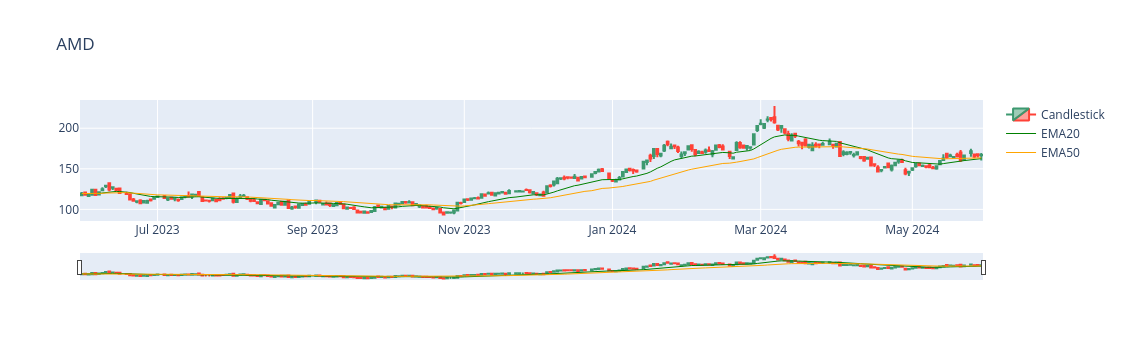

In [6]:
fig = go.Figure()
candle = go.Candlestick(x=amd_df.index, open = amd_df['Open'], 
                       high=amd_df['High'], low=amd_df['Low'],
                       close=amd_df['Close'], name='Candlestick')
ema20 = go.Scatter(x=amd_df.index, y=amd_df['MA20'],
                  line=dict(color='green', width=1), name='EMA20')
ema50 = go.Scatter(x=amd_df.index, y=amd_df['MA50'],
                  line=dict(color='orange', width=1), name='EMA50')
fig.add_trace(candle)
fig.add_trace(ema20)
fig.add_trace(ema50)
fig.update_layout(title="AMD")
fig.update_xaxes(rangebreaks=[dict(bounds=['sat', 'mon'])])
fig.show()

### Moving Average Convergence and Divergence

In [11]:
def plot_macd_stoch(ticker, time_period, time_int):
    stock_df = yf.download(tickers=ticker,
                          period=time_period,
                          interval=time_int)
    
    candle = go.Candlestick(x=stock_df.index, open = stock_df['Open'], 
                       high=stock_df['High'], low=stock_df['Low'],
                       close=stock_df['Close'], name='Candlestick')

    stock_df['MA12'] = stock_df['Adj Close'].ewm(span=12, adjust=False).mean()
    stock_df['MA26'] = stock_df['Adj Close'].ewm(span=26, adjust=False).mean()

    macd = MACD(close=stock_df['Close'],
               window_slow=26,
               window_fast=12,
               window_sign=9)

    sto_os = StochasticOscillator(high=stock_df['High'],
                                 close=stock_df['Close'],
                                 low=stock_df['Low'],
                                 window=14,
                                 smooth_window=3)

    fig = make_subplots(rows=4, cols=1, shared_xaxes=True,
                       vertical_spacing=0.01)

    fig.add_trace(candle, row=1, col=1)
    
    fig.add_trace(go.Scatter(x=stock_df.index,
                            y = macd.macd(),
                            line=dict(color='blue', width=2)),
                 row=2, col=1)

    fig.add_trace(go.Scatter(x=stock_df.index,
                            y = macd.macd_signal(),
                            line=dict(color='orange', width=2)),
                 row=2, col=1)

    fig.add_trace(go.Bar(x=stock_df.index,
                        y=macd.macd_diff()),
                 row=2, col=1)

    fig.add_trace(go.Scatter(x=stock_df.index,
                            y=sto_os.stoch(),
                            line=dict(color='blue', width=2)),
                 row=3, col=1)

    fig.add_trace(go.Scatter(x=stock_df.index,
                            y=sto_os.stoch_signal(),
                            line=dict(color='orange', width=2)),
                 row=3, col=1)    

    fig.add_hline(y=20, line_width=1, line_dash="dash",
                 line_color="red", row=3, col=1)
    
    fig.add_hline(y=80, line_width=1, line_dash="dash",
                 line_color="green", row=3, col=1) 

    fig.add_trace(go.Bar(x=stock_df.index,
                        y=stock_df['Volume']),
                 row=4, col=1)

    fig.update_layout(title=ticker)
    fig.update_yaxes(title_text="Price", row=1, col=1)
    fig.update_yaxes(title_text="MACD", row=2, col=1)
    fig.update_yaxes(title_text="Stoch", row=3, col=1)
    fig.update_yaxes(title_text="Volume", row=4, col=1)

    fig.update_layout(height=900, width=1200, showlegend=False, xaxis_rangeslider_visible=False, 
                      xaxis_rangebreaks=[dict(bounds=["sat", "mon"]), dict(bounds=[16, 9.5], pattern="hour")])

    fig.show()

[*********************100%%**********************]  1 of 1 completed


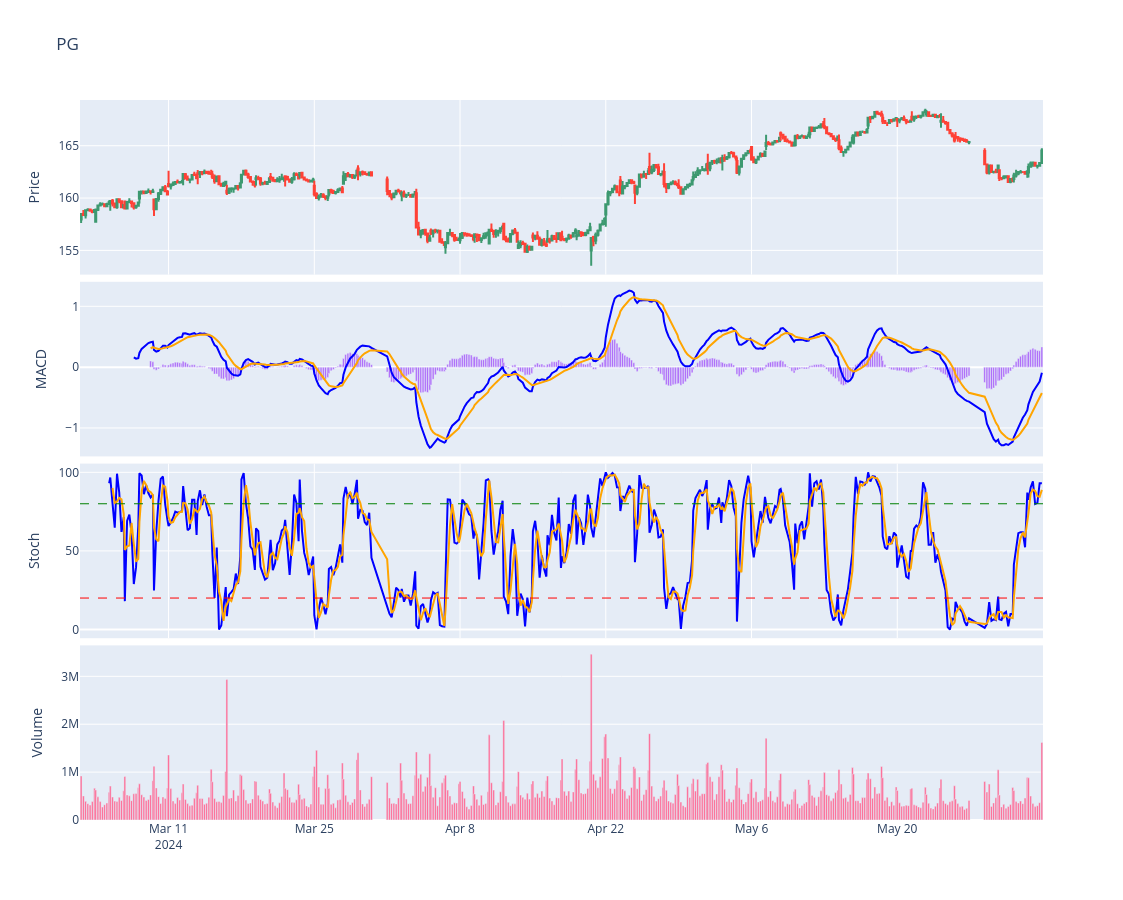

In [15]:
plot_macd_stoch("PG", "3mo", "1h")